# The bouncing rectangle


In the office there's this scene where Michael is talking about something and everyone's attention is focused on the tv, because they want to know if the bouncing rectangle on the screen will ever bounce off a corner. The scene is very funccy because everyone cheers when it finally happens and michael thinks the applauses are for him. 

That got me thinking, ok suppose i throw the rectangle at an angle $\theta$, say 30 degrees, how many times will it have to bounce of the wall to reach a corner, will it be periodic? , will it happen just for certain angles?, if it happens what is the period for a given angle?

I plan to do some simulations of this system in this notebook to see if i can identify something interesting, 

In [2]:

#First of all lets define our own rectangle
import matplotlib.patches as patches
class Rectangle:
    """
    Rectangle object receives 4 parameters x,y,width and height where x and y are  the coordinates of the left bottom
    corner of the rectangle    
    """ 
    
    velocityX = 0
    velocityY = 0
    
    def __init__(self, x,y,width,height):
        self.cornerX = x
        self.cornerY = y
        self.width = width
        self.height = height
    
    #Method to get the corner
    def getRightTopCorner(self):
        return self.cornerX + self.width, self.cornerY + self.height
    
    #Function to set a velocity for the rectangle
    def setVelocity(self, velocityX,velocityY):
        self.velocityX = velocityX
        self.velocityY = velocityY
    
    #Function to update the rectangle
    def updateRectangle(self):
        self.cornerX = self.cornerX + self.velocityX
        self.cornerY = self.cornerY + self.velocityY
    



In [3]:
#We can draw it using the patches.Rectangle of matplotlib
import matplotlib.pyplot as plt

rec = Rectangle(10,10,20,20)
ax = plt.axes(xlim  = (0,100), ylim = (0,100))
ax.add_patch(patches.Rectangle((rec.cornerX,rec.cornerY),rec.width,rec.height,facecolor = 'lime',edgecolor = 'none'))
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from enum import Enum 

class ColissionType(Enum):
    NO_COLISSION = 0
    COLISSION_ON_BORDER = 1
    COLISSION_ON_CORNER = 2

In [5]:
#Now we will create the bounding box

class BouncingBox:
    
    def __init__(self,width,height):
        self.width = width
        self.height = height
        self.rectangle = Rectangle(0,0,self.width,self.height)
    
    def getBounceVelocity(self,rect):
        
        velX = rect.velocityX
        velY = rect.velocityY
        
        #If the rectangle is inside the bouncing box 
        if(rect.cornerX +rect.width < self.width and rect.cornerX >0 and rect.cornerY + rect.height < self.height and rect.cornerY > 0):
            pass
        #If it bounced
        else:
            if(rect.cornerX+rect.width > self.width or rect.cornerX < 0):
                velX  = -velX
            if(rect.cornerY+rect.height > self.height or rect.cornerY <0):
                velY = -velY
        return velX, velY
    
    def hitCorner(self,rect):
        velX = rect.velocityX
        velY = rect.velocityY
        conditionSum = 0
        #If the rectangle is inside the bouncing box 
        if(rect.cornerX +rect.width < self.width and rect.cornerX >0 and rect.cornerY + rect.height < self.height and rect.cornerY > 0):
            pass
        #If it bounced
        else:
            if(rect.cornerX+rect.width > self.width or rect.cornerX < 0):
                velX  = -velX
                conditionSum += 1
            if(rect.cornerY+rect.height > self.height or rect.cornerY <0):
                velY = -velY
                conditionSum  += 1
            
        colission = ColissionType(conditionSum)
        
        return velX, velY, colission
    
            

## Generating a bouncing box animation

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
class BouncingBoxAnimator:
    FPS = 10
    #Velocity in pixels per second
    VELOCITY = 10
    
    def __init__(self,widthInnerRect = 20,heightInnerRect = 20, widthBox = 100, heightBox = 100):
        
        #Initialize the bouncing box
        self.bouncingBox = BouncingBox(widthBox, heightBox)
        
        #Initialize the inner rect
        positionX = widthBox/2-widthInnerRect/2
        positionY = heightBox/2 -heightInnerRect/2
        self.innerRect = Rectangle(positionX,positionY,widthInnerRect,heightInnerRect)
    
    #Export an animation of the bouncing rectangle
    def exportBoxAnimation(self,startAngle,time,fileName):
        #We have the fps which are the frames per second, if we want the velocity to be 200 pixels per second we have 
        #to obtain pixels per frame for the update
        velocity = self.VELOCITY/self.FPS
        #First of all let's get the initial velocity and set the velocity of our rectangle to that
        velX = velocity*np.sin(startAngle)
        velY = velocity*np.cos(startAngle)
        #Set the velocity of the inner rectangle to that
        self.innerRect.setVelocity(velX,velY)
        fr = np.round(self.FPS*time)
        print("Numer of frames " +str(fr))
        #Create a figure
        self.fig = plt.figure()
        self.ax = plt.axes(xlim  = (0,self.bouncingBox.width), ylim = (0,self.bouncingBox.height))
        self.ax.invert_yaxis()
        anim = FuncAnimation(self.fig, self.animate, interval = 20,
                               frames=fr, blit=False)
        
        anim.save(fileName+".gif",fps=self.FPS,writer='pillowwriter') 

    def exportBoxMovie(self,startAngle,time,fileName):
        #We have the fps which are the frames per second, if we want the velocity to be 200 pixels per second we have 
        #to obtain pixels per frame for the update
        velocity = self.VELOCITY/self.FPS
        #First of all let's get the initial velocity and set the velocity of our rectangle to that
        velX = velocity*np.sin(startAngle)
        velY = velocity*np.cos(startAngle)
        #Set the velocity of the inner rectangle to that
        self.innerRect.setVelocity(velX,velY)
        fr = np.round(self.FPS*time)
        print("Numer of frames" +str(fr))
        #Create a figure
        self.fig = plt.figure()
        self.ax = plt.axes(xlim  = (0,self.bouncingBox.width), ylim = (0,self.bouncingBox.height))
        self.ax.invert_yaxis()
        anim = FuncAnimation(self.fig, self.animate, interval = (1/self.FPS)*10.0**3,
                               frames=fr, blit=False)
        writer = animation.writers['ffmpeg']
        writer = writer(fps=self.FPS, metadata=dict(artist='Walu the great',fps = str(self.FPS)), bitrate=1800)
        
        anim.save(fileName+".mp4",writer = writer) 
    
    def animate(self,i):
        velX, velY = self.bouncingBox.getBounceVelocity(self.innerRect)
        self.innerRect.setVelocity(velX,velY)
        self.innerRect.updateRectangle()
        print("|",end = "")
        self.ax.clear()
        self.ax.set_xlim(0,self.bouncingBox.width)
        self.ax.set_ylim(0,self.bouncingBox.height)
        self.ax.invert_yaxis()
        #The bouncing box
        self.ax.add_patch(patches.Rectangle((self.bouncingBox.rectangle.cornerX,self.bouncingBox.rectangle.cornerY),self.bouncingBox.rectangle.width,self.bouncingBox.rectangle.height,facecolor = 'dimgrey',edgecolor = 'none'))
        #The inner rect
        self.ax.add_patch(patches.Rectangle((self.innerRect.cornerX,self.innerRect.cornerY),self.innerRect.width,self.innerRect.height,facecolor = 'lime',edgecolor = 'none'))

Numer of frames1200
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

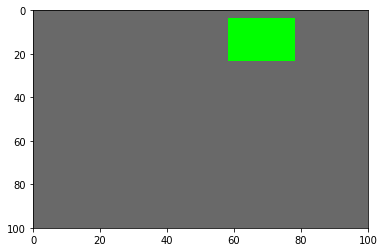

In [26]:
#Let's try it
animator = BouncingBoxAnimator()
animator.exportBoxMovie(np.pi/3,120,"bouncing_rect")

MovieWriter pillowwriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Numer of frames 450
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

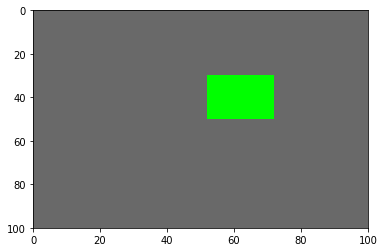

In [29]:
animator = BouncingBoxAnimator()
animator.exportBoxAnimation(np.pi/8,45,"box_anim")

In [7]:
import numpy as np

class BouncingBoxSimulator:
    #Velocity in pixels per second
    VELOCITY = 10
    FPS = 10
    
    def __init__(self,widthBox,heightBox,widthInnerRect,heightInnerRect):
        #Initialize the bouncing box
        self.bouncingBox = BouncingBox(widthBox, heightBox)
        
        #Initialize the inner rect
        positionX = widthBox/2-widthInnerRect/2
        positionY = heightBox/2 -heightInnerRect/2
        self.innerRect = Rectangle(positionX,positionY,widthInnerRect,heightInnerRect)
    
    
    def runSimulation(self,startAngle,time):
        positionX = self.bouncingBox.width/2-self.innerRect.width/2
        positionY = self.bouncingBox.height/2 -self.innerRect.height/2
        self.innerRect.cornerX = positionX
        self.innerRect.cornerY = positionY
        
        velocity = self.VELOCITY/self.FPS
        velX = velocity*np.sin(startAngle)
        velY = velocity*np.cos(startAngle)
        self.innerRect.setVelocity(velX,velY)
        fr = np.round(self.FPS*time)
        #Simulation will return every time the box bounced
        
        simulation = []
        
        for i in range(1,fr):
            velX, velY, colType = self.bouncingBox.hitCorner(self.innerRect)
            self.innerRect.setVelocity(velX,velY)
            self.innerRect.updateRectangle()
            
            #If the rectangle  hit then we append it 
            if(colType == ColissionType.COLISSION_ON_BORDER or colType == ColissionType.COLISSION_ON_CORNER):
                simulation.append(colType)
            
        return simulation
    
    def runOrbitSimulation(self,startAngle,time):
        positionX = self.bouncingBox.width/2-self.innerRect.width/2
        positionY = self.bouncingBox.height/2 -self.innerRect.height/2
        self.innerRect.cornerX = positionX
        self.innerRect.cornerY = positionY
        
        velocity = self.VELOCITY/self.FPS
        velX = velocity*np.sin(startAngle)
        velY = velocity*np.cos(startAngle)
        self.innerRect.setVelocity(velX,velY)
        fr = np.round(self.FPS*time)
        #Simulation will return every time the box bounced
        
        simulation = np.empty((0,2))
        
        for i in range(1,fr):
            velX, velY = self.bouncingBox.getBounceVelocity(self.innerRect)
            self.innerRect.setVelocity(velX,velY)
            self.innerRect.updateRectangle()
            xMiddle = self.innerRect.cornerX+self.innerRect.width/2
            yMiddle = self.innerRect.cornerY+self.innerRect.height/2
            #if(not np.array([xMiddle,yMiddle]) in simulation):
            simulation = np.append(simulation,[[xMiddle,yMiddle]],axis = 0)
        return simulation
        
    def runCornerHitExperiment(self,time):
        angleArray = np.linspace(0,2*np.pi,1000)
        hitCornerArray = []
        
        for angle in angleArray:
            sim = self.runSimulation(angle,time)
            s = 0
            for val in sim:
                if(val == ColissionType.COLISSION_ON_CORNER):
                    s = s+1
            
            hitCornerArray.append(s)
        return np.array(angleArray)*180/np.pi, np.array(hitCornerArray)
        
    def runBorderHitExperiment(self,time):
        angleArray = np.linspace(0,2*np.pi,1000)
        hitBorderArray = []
        
        for angle in angleArray:
            sim = self.runSimulation(angle,time)
            s = 0
            for val in sim:
                if(val == ColissionType.COLISSION_ON_BORDER):
                    s = s+1
            
            hitBorderArray.append(s)
        return np.array(angleArray)*180/np.pi, np.array(hitBorderArray)
            
            
        
        
    

Now we will plot how many times the box hits the corner for every angle in a simulation of 5 minutes

In [30]:
simulator = BouncingBoxSimulator(100,100,20,20)
angleArray,exp = simulator.runCornerHitExperiment(300)


Text(0, 0.5, '# times it hit the corner')

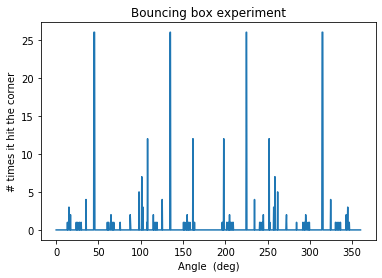

In [31]:
#plot the results
plt.plot(angleArray,exp)
plt.title("Bouncing box experiment")
plt.xlabel("Angle  (deg)")
plt.ylabel("# times it hit the corner")

(array([974.,  10.,   2.,   0.,   4.,   0.,   0.,   0.,   0.,  10.]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

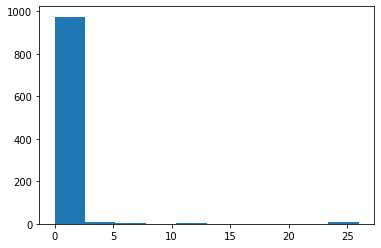

In [59]:
#A histogram
plt.hist(exp)

In [62]:

simulator = BouncingBoxSimulator(100,100,20,20)
angleArray,exp = simulator.runBorderHitExperiment(300)

In [77]:
np.where(np.round(angleArray) == 90)

(array([249, 250, 251], dtype=int64),)

Text(0, 0.5, '# times it hit borders (not corner)')

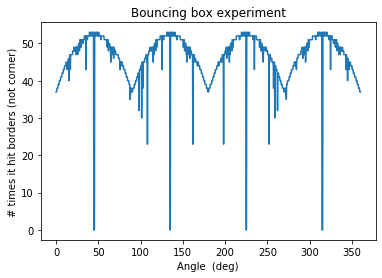

In [63]:
#plot the results
plt.plot(angleArray,exp)
plt.title("Bouncing box experiment")
plt.xlabel("Angle  (deg)")
plt.ylabel("# times it hit borders (not corner)")

The last plot shows the number of times that the box hits a border but not a corner for every angle, it is kind of interesting that on average it hits more and more till we approach 45, this makes sense because it would be bouncing closer and closer to the two opposite corners everytime, and this will increase the count of bounces. The smaller number of bounces is reached for  angles close to multiples  of 90 degrees, this also makes sense because it is the one where you hit borders closer to the middle, and so it is not likely that you will hit adjacent walls in a short time.   

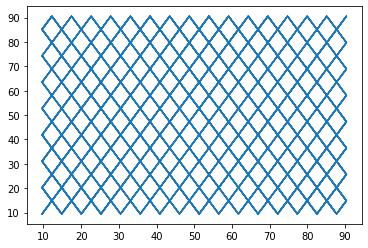

In [10]:
#Now let's see some trajectories
simulator = BouncingBoxSimulator(100,100,20,20)
orb = simulator.runOrbitSimulation(np.pi/7, 1000)
plt.plot(orb[:,0],orb[:,1])

What is interesting is that some angles seem to produce cyclical results, like the previous one  while others seem to be quite non clyclical like the following one

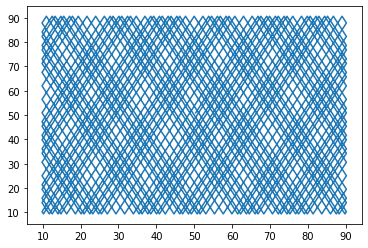

In [11]:
simulator = BouncingBoxSimulator(100,100,20,20)
orb = simulator.runOrbitSimulation(np.pi/8, 1000)
plt.plot(orb[:,0],orb[:,1])

In that last one it is quite evident that eventually all points of the region would be traversed, let's do it with a larger simulation

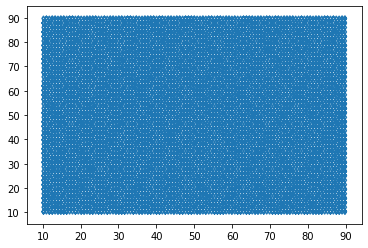

In [14]:
simulator = BouncingBoxSimulator(100,100,20,20)
orb = simulator.runOrbitSimulation(np.pi/8, 3000)
plt.plot(orb[:,0],orb[:,1])

See! it would be great if one could find a condition for when the box is going to be cyclical or when it is going to diverge int his way, such a condition would of course depend on the dimensions of the bigger box